# Automated Topic  Labelling for Quora Question Dataset with the help of LDA

### Basic Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Quora_questions CSV file

In [2]:
df = pd.read_csv('quora_questions.csv')

In [3]:
df.head()

,Question
0,How do I read and find my YouTube comments?
1,What can make Physics easy to learn?
2,What was your first sexual experience like?
3,What are the laws to change your status from a...
4,What would a Trump presidency mean for current...


### Some basic visualisations & Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404278 entries, 0 to 404277
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Question  404278 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [5]:
# Checking is there any duplicate rows.
df.duplicated().sum()

113831

In [6]:
# Deleting duplicate rows.
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

Question    0
dtype: int64

In [8]:
# Confirming that duplicate rows has been deleted.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290447 entries, 0 to 404277
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Question  290447 non-null  object
dtypes: object(1)
memory usage: 4.4+ MB


In [9]:
# Adding additional column just for some more analysis,Not that important in Topic Modelling.
df['Question_length'] = df['Question'].apply(len)

In [10]:
df.head()

,Question,Question_length
0,How do I read and find my YouTube comments?,43
1,What can make Physics easy to learn?,36
2,What was your first sexual experience like?,43
3,What are the laws to change your status from a...,141
4,What would a Trump presidency mean for current...,93


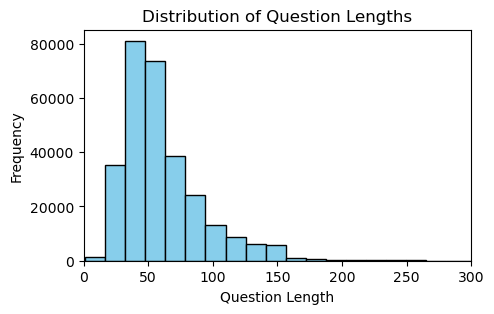

In [11]:
# Visualization: Histogram of question lengths
plt.figure(figsize=(5, 3))
plt.hist(df['Question_length'], bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Question Lengths')
plt.xlim(0,300)
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

### Wordcloud

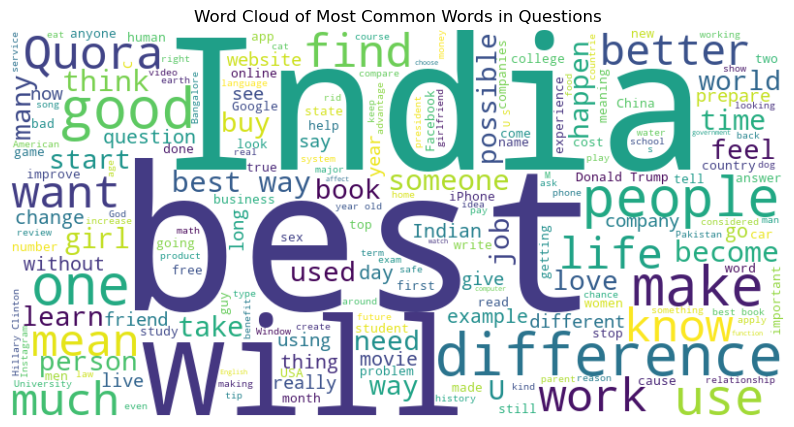

In [12]:
from wordcloud import WordCloud
# Text analysis: Generate word cloud of most common words in questions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Question']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Common Words in Questions')
plt.axis('off')
plt.show()

In [13]:
# Dropping againg that column.
df=df.drop('Question_length',axis=1)

In [14]:
df.head()

,Question
0,How do I read and find my YouTube comments?
1,What can make Physics easy to learn?
2,What was your first sexual experience like?
3,What are the laws to change your status from a...
4,What would a Trump presidency mean for current...


### Importing libraries needed for preprocessing

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sifta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sifta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sifta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Preprocessing the text Data

In [16]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply the preprocessing function to the 'Question' column
df['Question'] = df['Question'].apply(preprocess_text)

In [17]:
df.head()

,Question
0,read find youtube comment
1,make physic easy learn
2,first sexual experience like
3,law change status student visa green card u co...
4,would trump presidency mean current internatio...


### Creating The Document-Term Matrix

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')

In [20]:
dtm = tfidf.fit_transform(df['Question'])

In [21]:
dtm

<290447x32627 sparse matrix of type '<class 'numpy.float64'>'
	with 1395476 stored elements in Compressed Sparse Row format>

### Importing and Training the LDA model

In [22]:
from sklearn.decomposition import LatentDirichletAllocation

In [23]:
LDA_model = LatentDirichletAllocation(n_components=30,random_state=786)

In [24]:
LDA_model.fit(dtm)

LatentDirichletAllocation(n_components=30, random_state=786)

In [25]:
len(tfidf.get_feature_names())

C:\Users\sifta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


32627

In [26]:
import random

for i in range(10):
    random_word_id = random.randint(0,len(tfidf.get_feature_names()))
    print(tfidf.get_feature_names()[random_word_id],end=", ")

autonomous, swinging, fullsize, plaster, southern, hood, debit, ios7, proposition, method, 

In [27]:
len(LDA_model.components_)

30

In [28]:
# LDA_model.components_ attribute typically contains the topic-word distributions learned by the LDA
# model. Each row corresponds to a topic, and each column corresponds to a word in the vocabulary. 
# The value in each cell represents the probability of that word occurring in the corresponding topic.
LDA_model.components_

array([[0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333],
       [0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333],
       [0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333],
       ...,
       [0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333],
       [0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333],
       [0.03333333, 0.03333333, 0.03333333, ..., 0.03333333, 0.03333333,
        0.03333333]])

In [29]:
len(LDA_model.components_[0])

32627

### Viewing the Topic 0 in some depth to draw some common conclusions

In [30]:
Topic_0=LDA_model.components_[0]

In [31]:
# Returns the indices that would sort this array.
a=Topic_0.argsort()
a

array([32626, 26281, 26282, ...,  6660, 28133, 30562], dtype=int64)

In [32]:
# Word least representative of this topic
Topic_0[a[0]]

0.03333333333333333

In [33]:
# Word most representative of this topic
Topic_0[a[-1:]]

array([709.16526698])

In [34]:
# Top 10 words for this topic:
Topic_0.argsort()[-10:]

array([18345, 20061,  4110, 15905, 10339, 22964, 10773,  6660, 28133,
       30562], dtype=int64)

In [35]:
top_word_indices = Topic_0.argsort()[-25:]

In [36]:
for index in top_word_indices:
    print(tfidf.get_feature_names()[index],end=", ")

graduate, day, india, master, 2017, science, going, score, good, career, degree, study, year, employee, major, mba, new, best, job, engineering, prepare, exam, college, student, university, 

### Printing the top 40 most common words for each of the 30 topics.

In [53]:
for index,topic in enumerate(LDA_model.components_):
    print(f'THE TOP 40 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-40:]])
    print('\n')

THE TOP 40 WORDS FOR TOPIC #0
['placement', 'medical', 'btech', 'computer', 'thing', 'company', 'school', 'admission', 'apply', 'program', 'know', 'gate', 'looking', 'cat', 'course', 'graduate', 'day', 'india', 'master', '2017', 'science', 'going', 'score', 'good', 'career', 'degree', 'study', 'year', 'employee', 'major', 'mba', 'new', 'best', 'job', 'engineering', 'prepare', 'exam', 'college', 'student', 'university']


THE TOP 40 WORDS FOR TOPIC #1
['effect', 'valley', 'share', 'like', 'silicon', 'reliable', 'tired', 'country', 'networking', 'dimension', 'identify', 'bitcoin', 'messenger', 'tc', 'native', 'india', 'wake', 'poor', 'masturbate', 'early', 'british', 'european', 'english', 'american', 'racist', 'indian', 'speaker', 'morning', 'celebrity', 'economy', 'positive', 'people', 'speak', 'negative', 'invest', 'rich', 'disadvantage', 'market', 'stock', 'advantage']


THE TOP 40 WORDS FOR TOPIC #2
['viewed', 'comment', 'text', 'life', '14', 'tinder', '13', 'body', 'married', 'losi

['ball', 'ban', 'indian', 'week', 'day', 'pound', 'india', 'money', 'trust', 'help', 'latest', 'exercise', 'make', 'individual', 'minute', '2000', 'masturbation', 'correct', 'loan', 'visa', 'loss', 'month', 'improve', 'time', 'seo', 'way', 'best', 'faster', 'light', 'currency', 'speed', 'rupee', 'letter', 'gain', '500', '1000', 'travel', 'note', 'lose', 'weight']


THE TOP 40 WORDS FOR TOPIC #20
['difference', 'world', 'germany', 'funding', '12', 'electrical', 'job', 'philippine', 'improvement', 'fail', 'topic', 'fish', 'africa', 'focus', 'powerful', 'cbse', 'school', 'study', 'good', 'taste', 'fun', 'german', 'best', 'indian', 'like', 'korea', 'population', 'board', 'software', 'grade', 'civil', 'india', 'north', 'class', 'south', 'research', 'mechanical', 'education', 'engineering', 'engineer']


THE TOP 40 WORDS FOR TOPIC #21
['overcome', 'gay', 'use', 'people', 'access', 'know', 'blocked', 'file', 'block', 'way', 'user', 'follow', 'wifi', 'send', 'page', 'address', 'follower', 'del

###  Adding a new column to the original quora dataframe that labels each question into one of the 30 topic categories.

In [38]:
topic_results = LDA_model.transform(dtm)

In [39]:
topic_results.argmax(axis=1)

df['Topic'] = topic_results.argmax(axis=1)

In [40]:
df.head()

,Question,Topic
0,read find youtube comment,11
1,make physic easy learn,11
2,first sexual experience like,14
3,law change status student visa green card u co...,23
4,would trump presidency mean current internatio...,19


### Assigning two different names to each topic for more broader view

#### Note that Labelling of topic is done manually based on the top most 40 occuring words, So it is possible that it might not be able to classify each question correctly

In [70]:
mytopic_dict={
    0: ["Academic Pursuits and Career Development", "Educational Advancement and Professional Growth"],
    1: ["Social Issues and Cultural Perspectives", "Societal Concerns and Cultural Insights"],
    2: ["Health and Wellness", "Well-being and Holistic Health"],
    3: ["Technology and Gadgets", "Digital Innovations and Gadget Trends"],
    4: ["Creativity and Innovation", "Artistic Expression and Innovative Ideas"],
    5: ["Computer Science and Programming", "Coding Adventures and Tech Exploration"],
    6: ["Psychology and Mental Health", "Mind Matters and Psychological Insights"],
    7: ["Global Development and Innovation", "World Progress and Innovations Showcase"],
    8: ["Writing and Literature", "Literary Exploration and Writing Journey"],
    9: ["Social Issues and Diversity", "Diversity Matters and Social Dynamics"],
    10: ["Business and Entrepreneurship", "Entrepreneurial Ventures and Business Insights"],
    11: ["Learning and Skill Development", "Lifelong Learning and Skill Mastery"],
    12: ["Global Issues and Cultural Exchange", "Cross-Cultural Dialogue and Global Concerns"],
    13: ["Science and Technology Applications", "Scientific Advances and Tech Applications"],
    14: ["Relationships and Personal Life", "Interpersonal Connections and Personal Growth"],
    15: ["Philosophy and Existentialism", "Philosophical Musings and Existential Queries"],
    16: ["Technology and Science Applications", "Applied Sciences and Technological Frontiers"],
    17: ["Life Sciences and Health", "Biological Sciences and Health Insights"],
    18: ["Finance and Economic Development", "Financial Matters and Economic Trends"],
    19: ["Engineering and Technology", "Engineering Marvels and Technological Wonders"],
    20: ["Social Media and Digital Security", "Digital Presence and Cybersecurity Measures"],
    21: ["Life Challenges and Philosophy", "Overcoming Life's Hurdles and Philosophical Wisdom"],
    22: ["Travel and Adventure", "Wanderlust Journeys and Adventurous Tales"],
    23: ["Politics and Leadership", "Political Insights and Leadership Dynamics"],
    24: ["Political and Social Commentary", "Sociopolitical Discourse and Commentary"],
    25: ["Entertainment and Media", "Media Buzz and Entertainment Updates"],
    26: ["Personal Development and Self-Improvement", "Personal Growth and Self-Development Strategies"],
    27: ["Lifestyle and Personal Growth", "Living Well and Personal Evolution"],
    28: ["Learning and Personal Growth", "Lifelong Learning and Personal Development"],
    29: ["Exploration and Discovery", "Quest for Knowledge and Discovering Insights"]
}


In [ ]:
df['Topic_Label']=df['Topic'].map(mytopic_dict)

### Final Data after Topic Labelling

In [72]:
df.head()

,Question,Topic,Topic_Label
0,read find youtube comment,11,"[Learning and Skill Development, Lifelong Lear..."
1,make physic easy learn,11,"[Learning and Skill Development, Lifelong Lear..."
2,first sexual experience like,14,"[Relationships and Personal Life, Interpersona..."
3,law change status student visa green card u co...,23,"[Politics and Leadership, Political Insights a..."
4,would trump presidency mean current internatio...,19,"[Engineering and Technology, Engineering Marve..."


In [73]:
df.iloc[21212].values

array(['minimum hardware requirement trying deep learning', 29,
       list(['Exploration and Discovery', 'Quest for Knowledge and Discovering Insights'])],
      dtype=object)

In [66]:
df.iloc[10101].values

array(['indian student get top international university', 0,
       list(['Academic Pursuits and Career Development', 'Educational Advancement and Professional Growth'])],
      dtype=object)

In [67]:
df.iloc[90909].values

array(['whats great music listen reading', 11,
       list(['Learning and Skill Development', 'Lifelong Learning and Skill Mastery'])],
      dtype=object)

In [76]:
df.iloc[101010].values

array(['improve german pronunciation', 11,
       list(['Learning and Skill Development', 'Lifelong Learning and Skill Mastery'])],
      dtype=object)

### Questions from User

In [85]:
# Get user input
user_input = input("Enter a sentence: ")

# Convert user input to DataFrame
text_df = pd.DataFrame({'Text': [user_input]})

# Preprocess the text
text_df['Preprocessed_Text'] = text_df['Text'].apply(preprocess_text)

# Vectorize the preprocessed text
tfidf = TfidfVectorizer()
dtm = tfidf.fit_transform(text_df['Preprocessed_Text'])

# Fit LDA model
num_topics = 20  # Number of topics
LDA_model = LatentDirichletAllocation(n_components=num_topics)
LDA_model.fit(dtm)

# Generate topic dictionary dynamically
# Get topic results for the user input
topic_results = LDA_model.transform(dtm)
predicted_topic_index = topic_results.argmax(axis=1)[0]

# Map the predicted topic index to its corresponding label
predicted_topic_label = mytopic_dict.get(predicted_topic_index, "Unknown Topic")

print("Predicted Topic Label:", predicted_topic_label)


Enter a sentence: Is it difficult to prepare for IIT JEE Engineering exam
Predicted Topic Label: ['Academic Pursuits and Career Development', 'Educational Advancement and Professional Growth']


### Analysis after doing Labelling of each topic

In [90]:
# Number of different types of topics after topic modelling.
df['Topic_Label'].value_counts()

Topic_Label
[Academic Pursuits and Career Development, Educational Advancement and Professional Growth]     20935
[Learning and Skill Development, Lifelong Learning and Skill Mastery]                           14144
[Life Challenges and Philosophy, Overcoming Life's Hurdles and Philosophical Wisdom]            13521
[Relationships and Personal Life, Interpersonal Connections and Personal Growth]                13074
[Technology and Gadgets, Digital Innovations and Gadget Trends]                                 12602
[Entertainment and Media, Media Buzz and Entertainment Updates]                                 11692
[Personal Development and Self-Improvement, Personal Growth and Self-Development Strategies]    11441
[Politics and Leadership, Political Insights and Leadership Dynamics]                           10209
[Health and Wellness, Well-being and Holistic Health]                                            9946
[Social Issues and Diversity, Diversity Matters and Social Dynamics]  

In [91]:
# As we have already Labelled the topic names.
df=df.drop('Topic',axis=1)

In [92]:
# This is our final df after topic modelling.
df.head()

,Question,Topic_Label
0,read find youtube comment,"[Learning and Skill Development, Lifelong Lear..."
1,make physic easy learn,"[Learning and Skill Development, Lifelong Lear..."
2,first sexual experience like,"[Relationships and Personal Life, Interpersona..."
3,law change status student visa green card u co...,"[Politics and Leadership, Political Insights a..."
4,would trump presidency mean current internatio...,"[Engineering and Technology, Engineering Marve..."


### Note

#### Since Topic Labelling is done manually based on the top 40 most occuring words, There is a chance that some questions may not be labelled correctly, that's why I have given two Labels for each question for more generalised topic modelling.

# THANK YOU